<h1>Notes</h1>

- Convolution operators can be found in: numpy, astropy, scipy. 
  - numpy: only 1-D
  - scipy has several multi-D options: generic, generic function, gaussian, uniform, laplace, gaussian gradient, rank
    - generic filters require that a kernel 2D or 3D array be built by the user. There are no kernel building helper functions or classes. Building a 3D kernel for spatial/spectral cube is non-trivial.
  - astropy: sounds better than scipy:
    - proper treatment of NaN values
    - a single function for 1-D, 2-D, and 3-D convolution
    - improved options for the treatment of edges
    - both direct and Fast Fourier Transform (FFT) versions
    - built-in kernels that are commonly used in astronomy. These are 1 and 2-D only, but ease the task of building a 3-D spatial/spectral kernel.
   - but these come with a price, because it is 100X slower

- Use of different packages is mostly a matter of taste?
- Do timing tests.
- Decoupling higher dimensionality convolution into a sequence of 1D convolutions (for symmetrical kernels) can be an option for increasing speed.
- GUI access should emphasize easy interaction with kernel specificatiion.


Initial, temporary conclusion is that scripting access is a no-brainer. GUI access on the other hand can be significantly complicated in the way the many existing options can be presented to and picked by the user.



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.io import fits
from __future__ import print_function
%matplotlib inline

<h1>Test data cube</h1>

In [6]:
datacube = fits.getdata('./data/Eagle.fits')
datacube.shape

(6000, 26, 143)

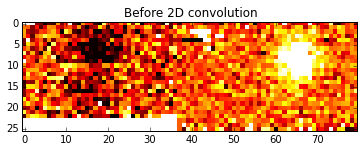

In [7]:
fig, ax = plt.subplots(figsize=(6, 8))
data = datacube[3358, :, 10:90]
ax.imshow(data, cmap=cm.hot, vmin=-10, vmax=10, interpolation='nearest')
ax.set_title('Before 2D convolution')

<h1>2-D smoothing</h1>

In [8]:
from astropy.convolution import convolve
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel,AiryDisk2DKernel

# not using these, but import just to show what is available.
from astropy.convolution import Box2DKernel, MexicanHat2DKernel, Ring2DKernel,TrapezoidDisk2DKernel
    
gauss_kernel = Gaussian2DKernel(0.75)
tophat_kernel = Tophat2DKernel(2.5)
airy_kernel = AiryDisk2DKernel(2.5)
print('Gaussian kernel shape: ', gauss_kernel.shape)
print('Tophat kernel shape:', tophat_kernel.shape)
print('Airy disk kernel shape:', airy_kernel.shape)
data_gauss_convolved = convolve(data, gauss_kernel)
data_tophat_convolved = convolve(data, tophat_kernel)
data_airy_convolved = convolve(data, airy_kernel)

Gaussian kernel shape:  (7, 7)
Tophat kernel shape: (5, 5)
Airy disk kernel shape: (21, 21)


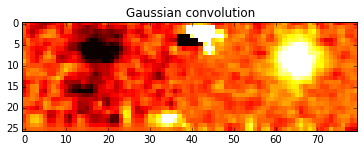

In [9]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(data_gauss_convolved, cmap=cm.hot, vmin=-10, vmax=10, interpolation='nearest')
ax.set_title('Gaussian convolution')

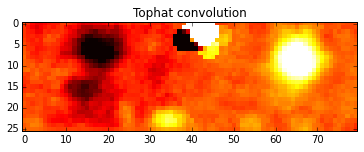

In [10]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(data_tophat_convolved, cmap=cm.hot, vmin=-10, vmax=10, interpolation='nearest')
ax.set_title('Tophat convolution')

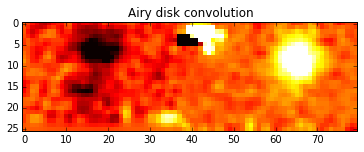

In [11]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(data_airy_convolved, cmap=cm.hot, vmin=-10, vmax=10, interpolation='nearest')
ax.set_title('Airy disk convolution')

<h1>3-D smoothing</h1>

In [24]:
from astropy.convolution import Gaussian1DKernel

k1 = Gaussian1DKernel(2.)
k2 = Gaussian2DKernel(0.75)
v1 = k1._array
v2 = k2._array
kernel = np.zeros(shape=[k1.shape[0],k2.shape[0],k2.shape[1]])
for i in range(k2.shape[0]):
    for j in range(k2.shape[1]):
        kernel[:,i,j] = v2[i,j] * v1
        
print(kernel.shape)

(17, 7, 7)


In [25]:
import time
start_time = time.time()

convolved = convolve(datacube, kernel)

end_time = time.time()
print(end_time - start_time)

96.2128651142


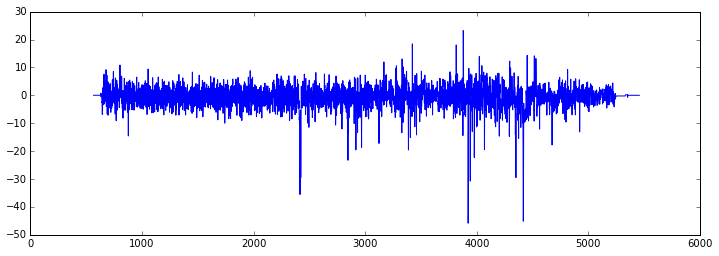

In [14]:
plt.gcf().set_size_inches(12.,4.)
spectrum = datacube[:, 10, 65]
x = np.array(range(len(spectrum)))
plt.plot(x, spectrum)

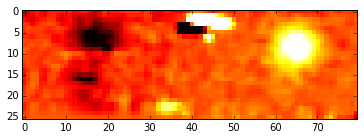

In [33]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(convolved[3358, :, 10:90], cmap=cm.hot, vmin=-10, vmax=10, interpolation='nearest')


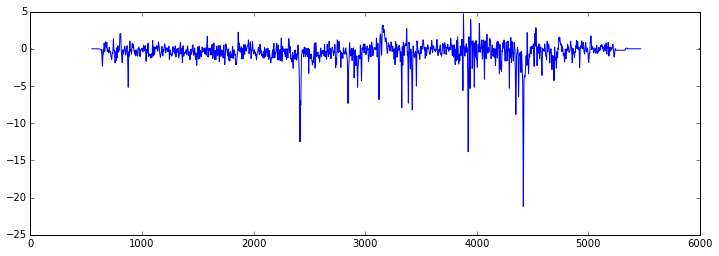

In [35]:
plt.gcf().set_size_inches(12.,4.)
spectrum = convolved[:, 10, 65]
x = np.array(range(len(spectrum)))
plt.plot(x, spectrum)


In [27]:
from scipy.ndimage import gaussian_filter
import time
start_time = time.time()

fcube = gaussian_filter(datacube, (2.0, 0.75, 0.75)) 

end_time = time.time()
print(end_time - start_time)


1.5191218853


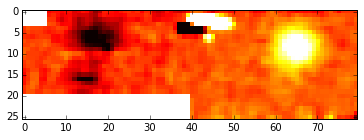

In [36]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(fcube[3358, :, 10:90], cmap=cm.hot, vmin=-10, vmax=10, interpolation='nearest')

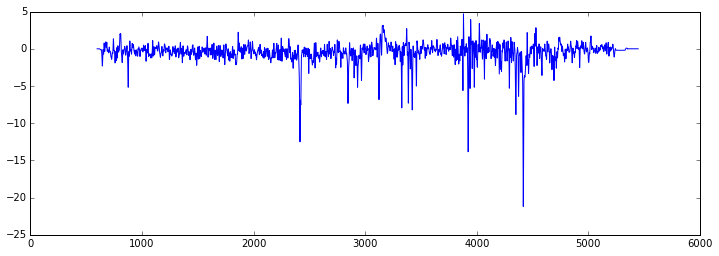

In [37]:
plt.gcf().set_size_inches(12.,4.)
spectrum = fcube[:, 10, 65]
x = np.array(range(len(spectrum)))
plt.plot(x, spectrum)

